In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [2]:
classes = []

with open("coco.names", 'r') as f:
    classes = [line.strip() for line in f.readlines()]S

COLORS = np.random.uniform(0, 255, size=(len(classes), 3))

yolo = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [3]:
def draw_prediction(img, class_id, confidence, x, y, x_plus_w, y_plus_h):

    label = str(classes[class_id])

    color = COLORS[class_id]

    cv2.rectangle(img, (x,y), (x_plus_w,y_plus_h), color, 2)

    cv2.putText(img, label, (x-10,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

In [4]:
img = cv2.imread("city-traffic-congestion.png")
dim = (800, 700)

In [5]:
image = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [6]:
Width = image.shape[1]
Height = image.shape[0]
scale = 0.00392

In [7]:
blob = cv2.dnn.blobFromImage(image, scale, (416,416), (0,0,0), True, crop=False)

In [8]:
yolo.setInput(blob)

In [9]:
output_layer_names = yolo.getUnconnectedOutLayersNames()
outs = yolo.forward(output_layer_names)

In [10]:
class_ids = []
confidences = []
boxes = []
conf_threshold = 0.5
nms_threshold = 0.4

In [11]:
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * Width)
            center_y = int(detection[1] * Height)
            w = int(detection[2] * Width)
            h = int(detection[3] * Height)
            x = center_x - w / 2
            y = center_y - h / 2
            class_ids.append(class_id)
            confidences.append(float(confidence))
            boxes.append([x, y, w, h])

In [12]:
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)

In [13]:
print(indices) 

[ 11   8  62  42   7   5  13   3  24  91  10  86  49  67  95  30 105  56
  94  54  40  18  33  22  87  89  84  98 102 103  97  88 107 106 100  17
 101]


In [14]:
bicycles = 0
cars = 0
motorcycles = 0
buses = 0
trucks = 0
areas = boxes
total_area = 0
road_area = Width*Height*0.85

In [15]:
for i in indices:
    box = boxes[i]
    x = box[0]
    y = box[1]
    w = box[2]
    h = box[3]
    areas[i] = w*h*0.9
    if (class_ids[i] == 1):
        bicycles += 1
        total_area += areas[i]
    if (class_ids[i] == 2):
        cars += 1
        total_area += areas[i]
    if (class_ids[i] == 3):
        motorcycles += 1
        total_area += areas[i]
    if (class_ids[i] == 5):
        buses += 1
        total_area += areas[i]
    if (class_ids[i] == 7):
        trucks += 1
        total_area += areas[i]
    draw_prediction(image, class_ids[i], confidences[i], round(x), round(y), round(x+w), round(y+h))

In [16]:
occupancy = (total_area/road_area)*100

In [17]:
print("pecentage occupancy: "+ "{}".format(occupancy))

pecentage occupancy: 69.81144957983192


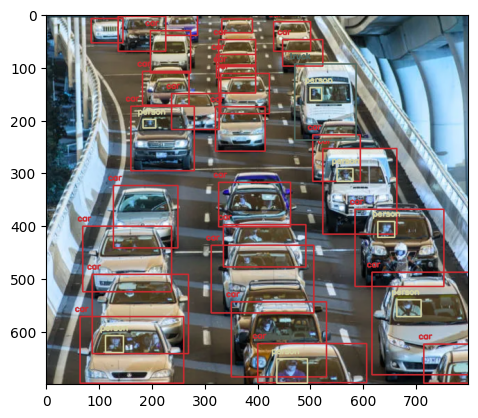

In [18]:
plt.imshow(image)

In [19]:
cv2.imwrite("object-detection.jpg", image)

True

In [20]:
#Emergency Vehicle detection

In [21]:
train_ds = 'dataset/train.csv'
test_ds = 'dataset/test_vc2kHdQ.csv'

In [22]:
import pandas as pd

train_df = pd.read_csv(train_ds)
train_df = train_df.iloc[:2000]
test_df = pd.read_csv(test_ds)

train_images = train_df.image_names
test_images = test_df.image_names

In [23]:
test_df

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg
...,...
701,674.jpg
702,1027.jpg
703,447.jpg
704,2176.jpg


In [24]:
train_df

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0
...,...,...
1995,2817.jpg,0
1996,2819.jpg,0
1997,2820.jpg,1
1998,2821.jpg,1


In [25]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_df.emergency_or_not)

In [26]:
train_labels=np.array(train_labels[:2000])

In [27]:
print("No. of train images", len(train_images))
print("No. of test images", len(test_images))

No. of train images 2000
No. of test images 706


In [28]:
import os
image_path = os.path.join('dataset/images')

In [29]:
images = []

for i in os.listdir(image_path):
    for j in train_images:
        if i == j:
            images.append((image_path+'/'+i))

img = cv2.imread(images[0])

In [30]:
resized_images = []

for i in images:
    img = cv2.imread(i)
    img = Image.fromarray(img, 'RGB')
    img = img.resize((150, 150))
    img = np.array(img)
    img = img/255.0
    resized_images.append(img)

In [31]:
resized_images = np.array(resized_images)
resized_images.shape

(2000, 150, 150, 3)

In [32]:
resized_images[0]

array([[[0.55294118, 0.5254902 , 0.45098039],
        [0.55686275, 0.52941176, 0.45490196],
        [0.56078431, 0.53333333, 0.45882353],
        ...,
        [0.36470588, 0.34117647, 0.29803922],
        [0.36078431, 0.3372549 , 0.29411765],
        [0.38431373, 0.36078431, 0.31764706]],

       [[0.55294118, 0.5254902 , 0.45098039],
        [0.55686275, 0.52941176, 0.45490196],
        [0.56078431, 0.53333333, 0.45882353],
        ...,
        [0.38039216, 0.35686275, 0.31372549],
        [0.37254902, 0.34901961, 0.30588235],
        [0.37647059, 0.34901961, 0.30588235]],

       [[0.55294118, 0.5254902 , 0.45098039],
        [0.55686275, 0.52941176, 0.45490196],
        [0.56078431, 0.53333333, 0.45882353],
        ...,
        [0.36078431, 0.3372549 , 0.29411765],
        [0.3372549 , 0.31372549, 0.27058824],
        [0.36470588, 0.34509804, 0.30196078]],

       ...,

       [[0.16470588, 0.17254902, 0.17254902],
        [0.14509804, 0.15294118, 0.15294118],
        [0.14901961, 0

In [33]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input

## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=resized_images[0].shape)
base_model.trainable = False ## Not trainable weights

In [34]:
from tensorflow.keras import layers, models

flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(2, activation = 'softmax')


model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

In [35]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ ?                           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)


#es = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)

model.fit(resized_images, train_labels, epochs=5, batch_size=32,  validation_split=0.2)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.5923 - loss: 0.6933 - val_accuracy: 0.6125 - val_loss: 0.6779
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 104s 2s/step - accuracy: 0.5800 - loss: 0.6687 - val_accuracy: 0.6025 - val_loss: 0.7006
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 94s 2s/step - accuracy: 0.6376 - loss: 0.6373 - val_accuracy: 0.5875 - val_loss: 0.6944
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.6751 - loss: 0.5928 - val_accuracy: 0.4950 - val_loss: 0.7079
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 95s 2s/step - accuracy: 0.7366 - loss: 0.5570 - val_accuracy: 0.4975 - val_loss: 0.7187


In [37]:
model.save('ev_classifier.keras')

In [38]:
tst_images = []

for i in os.listdir(image_path):
    for j in test_images:
        if i == j:
            tst_images.append((image_path+'/'+i))

img = cv2.imread(images[0])

In [39]:
resized_tst_images = []

for i in tst_images:
    img = cv2.imread(i)
    img = Image.fromarray(img, 'RGB')
    img = img.resize((150, 150))
    img = np.array(img)
    img = img/255.0
    resized_tst_images.append(img)

In [40]:
resized_tst_images = np.array(resized_tst_images)
resized_tst_images.shape

(706, 150, 150, 3)

In [41]:
pred = model.predict(resized_tst_images)

23/23 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step


In [42]:
np.argmax(pred[3])

0

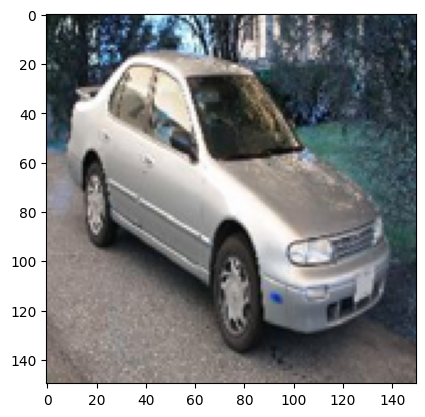

In [43]:
#test_image = cv2.imread(resized_tst_images[0])
plt.imshow(resized_tst_images[9])

In [59]:
def is_emergency_vehicle(vehicle_img):
    resized_img = cv2.resize(vehicle_img, (150, 150))
    
    normalized_img = resized_img / 255.0
    
    input_img = np.expand_dims(normalized_img, axis=0)

    prediction = model.predict(input_img, verbose=0)
    #print(prediction)
    
    if prediction[0][0] > prediction[0][1]:
        return False  # It's not an emergency vehicle
    else:
        return True  # It's an emergency vehicle

In [57]:
img = cv2.imread('city-traffic-congestion.png')
is_emergency_vehicle(img)

False

In [60]:
cap = cv2.VideoCapture('emergency.mp4')  

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    
    # Ensure frame is valid before processing
    if frame is None or frame.size == 0:
        continue
    
    height, width, channels = frame.shape
    
    # Perform object detection with YOLO
    blob = cv2.dnn.blobFromImage(frame, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    yolo.setInput(blob)
    outs = yolo.forward(output_layer_names)

    boxes = []
    confidences = []
    class_ids = []
    
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            
            # Filter for vehicles (car, bus, truck) with confidence > 0.5
            if class_id in [2, 5, 7] and confidence > 0.5:
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)
    
    # Apply non-maximum suppression to suppress weak overlapping boxes
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, score_threshold=0.5, nms_threshold=0.4)
    
    # Draw bounding boxes and classify as emergency or non-emergency
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = f'Vehicle {i+1}'
            color = (0, 255, 0)  # Default color for non-emergency
            
            # Extract vehicle image from frame
            vehicle_img = frame[y:y+h]
            
            if is_emergency_vehicle(vehicle_img):
                label += ' - Emergency'
                color = (0, 0, 255)  # Red color for emergency vehicles
            
            cv2.rectangle(frame, (x, y), (x+w, y+h), color, 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    cv2.imshow('Frame', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


KeyboardInterrupt: 